In [1]:
!pip install autogluon torch torchvision torchaudio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from autogluon.core.utils.loaders import load_zip

download_dir = './ag_automm_tutorial_doc_classifier'
zip_file = "https://automl-mm-bench.s3.amazonaws.com/doc_classification/rvl_cdip_sample.zip"
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 7.95M/7.95M [00:00<00:00, 13.8MiB/s]


In [2]:
dataset_path = os.path.join(download_dir, "rvl_cdip_sample")
rvl_cdip_data = pd.read_csv(f"{dataset_path}/rvl_cdip_train_data.csv")
train_data = rvl_cdip_data.sample(frac=0.8, random_state=200)
test_data = rvl_cdip_data.drop(train_data.index)

In [3]:
from autogluon.multimodal.utils.misc import path_expander

DOC_PATH_COL = "doc_path"

train_data[DOC_PATH_COL] = train_data[DOC_PATH_COL].apply(lambda ele: path_expander(ele, base_folder=download_dir))
test_data[DOC_PATH_COL] = test_data[DOC_PATH_COL].apply(lambda ele: path_expander(ele, base_folder=download_dir))
print(test_data.head())

                                             doc_path  label
1   /content/ag_automm_tutorial_doc_classifier/rvl...      0
6   /content/ag_automm_tutorial_doc_classifier/rvl...      0
7   /content/ag_automm_tutorial_doc_classifier/rvl...      0
11  /content/ag_automm_tutorial_doc_classifier/rvl...      0
14  /content/ag_automm_tutorial_doc_classifier/rvl...      0


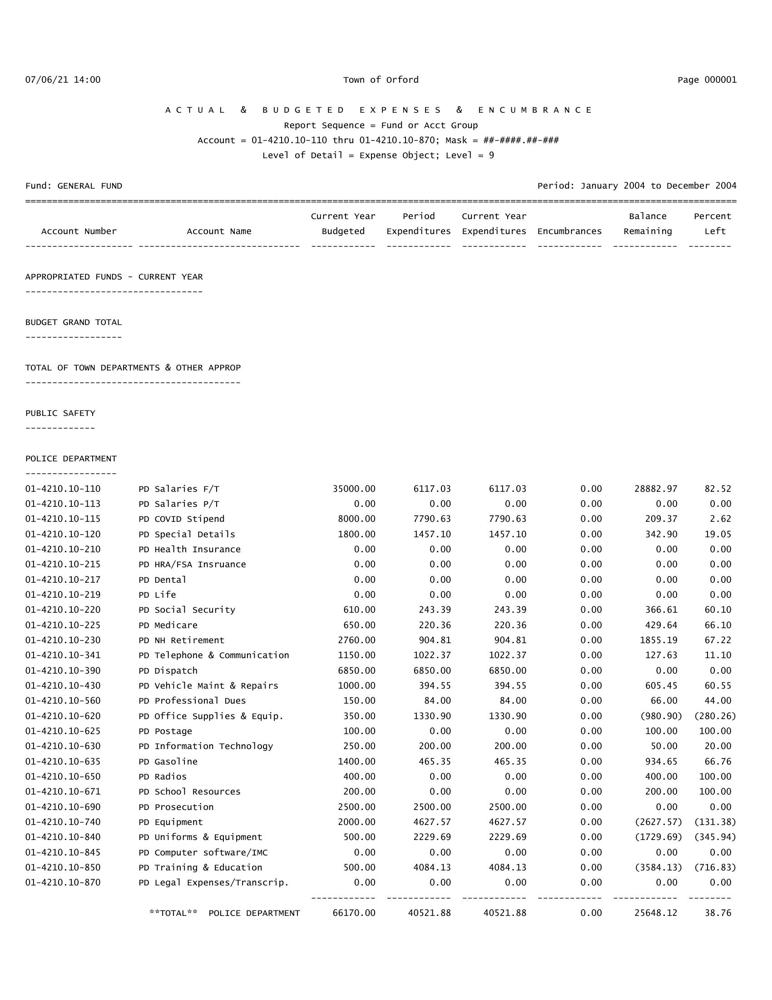

In [4]:
from IPython.display import Image, display

example_image = train_data.iloc[0][DOC_PATH_COL]
pil_img = Image(filename=example_image, width=500)
display(pil_img)

In [5]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label="label")
predictor.fit(
    train_data=train_data,
    hyperparameters={"model.document_transformer.checkpoint_name":"microsoft/layoutlm-base-uncased",
    "optimization.top_k_average_method":"best",
    },
    time_limit=120,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240915_025301"
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       10.54 GB / 12.67 GB (83.2%)
Disk Space Avail:   65.36 GB / 107.72 GB (60.7%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: 
  | Name              | Type                            | Params | Mode 
------------------------------------------------------------------------------
0 | model             | TimmAutoModelForImagePrediction | 95.7 M | train
1 | validation_metric | MulticlassAccuracy              | 0      | train
2 | loss_func         | CrossEntropyLoss                | 0      | train
------------------------------------------------------------------------------
95.7 M    Trainable params
0         Non-trainable params
95.7 M    Total params
382.759   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:02:00. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20240915_025301")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [6]:
scores = predictor.evaluate(test_data, metrics=["accuracy"])
print('The test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

The test acc: 0.500
